# 0: Import libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import regularizers
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import cv2

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

# 0: Download datasets

Download from github: xslobo05/MPA-MLF/miniproject-files

In [ ]:
!wget https://raw.githubusercontent.com/xslobo05/MPA-MLF/main/miniproject-files/x_test.csv
path = 'x_test.csv'
x_test = pd.read_csv(path)

!wget https://raw.githubusercontent.com/xslobo05/MPA-MLF/main/miniproject-files/x_train.csv
path = 'x_train.csv'
x_train = pd.read_csv(path)

!wget https://raw.githubusercontent.com/xslobo05/MPA-MLF/main/miniproject-files/y_train.csv
path = 'y_train.csv'
y_train = pd.read_csv(path)

--2023-03-23 09:35:04--  https://raw.githubusercontent.com/xslobo05/MPA-MLF/main/miniproject-files/x_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 551088 (538K) [text/plain]
Saving to: ‘x_test.csv.1’

x_test.csv.1        100%[===================>] 538.17K  --.-KB/s    in 0.04s   

2023-03-23 09:35:04 (12.6 MB/s) - ‘x_test.csv.1’ saved [551088/551088]

--2023-03-23 09:35:04--  https://raw.githubusercontent.com/xslobo05/MPA-MLF/main/miniproject-files/x_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2213327 (2.1

# 1: Data examination

In [ ]:
x_train

,Unnamed: 0,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,m_power,ph_err,mag_err,evm,Tosc,Tmix
0,0,592.234802,0.048079,-35.082729,-28.560846,1.993170,-0.499721,1.107926,1.507550,2.423943,39.9,47.6
1,1,-103.302032,-0.019917,-29.946953,-35.798664,-3.642311,-0.928193,1.236059,2.741568,3.458056,14.8,23.1
2,2,-582.331299,0.036379,-32.096672,-31.905628,2.835839,-1.272485,1.282163,2.140096,3.013522,42.5,48.6
3,3,-630.611267,0.063928,-38.216297,-30.084171,1.346316,-0.596438,1.154848,1.093465,2.254514,26.1,35.4
4,4,-415.526978,-0.055761,-29.180740,-36.601025,-3.963526,0.113055,1.498889,3.608737,4.286684,24.2,40.8
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,15355,-476.575653,0.039874,-39.792461,-29.962997,1.143736,-0.688359,1.175517,1.044636,2.224311,24.6,33.8
15356,15356,-345.645508,0.077925,-32.963398,-27.998444,2.524010,-1.135376,1.159356,1.948950,2.761400,55.1,62.7
15357,15357,-613.989807,0.090771,-38.951530,-28.111988,1.145893,0.352151,0.995857,0.938308,1.939818,39.5,46.9
15358,15358,-997.769531,0.099840,-39.532818,-27.819826,1.014136,0.040398,1.069736,0.875986,2.026062,51.7,58.4


In [ ]:
y_train

,id,target
0,0,5
1,1,1
2,2,6
3,3,3
4,4,2
...,...,...
15355,15355,3
15356,15356,8
15357,15357,7
15358,15358,7


In [ ]:
num_samp = len(x_train.index)
num_feat = len(x_train.columns)

print("Number of samples: ",num_samp)
print("Number of features: ",num_feat)

Number of samples:  15360
Number of features:  12


Some features will be removed - unwanted.

# 2: Data preprocessing


*   Remove unwanted features:

 *   m_power
 *   Tosc
 *   Tmix
*   Standardization per column




In [ ]:
x_train_pre = x_train.drop(['Unnamed: 0','m_power','Tosc','Tmix'],axis=1)

for column in x_train_pre:
 u = x_train_pre[column].mean()
 s = x_train_pre[column].std()
 x_train_pre[column] = x_train_pre[column].apply(lambda x: (x-u)/s)

In [ ]:
x_train_pre
#y_train

,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,2.347070,0.086360,0.024953,0.686504,0.633742,-0.543713,-0.343910,-0.523751
1,0.655952,-1.370985,0.972481,-1.256962,-1.611862,0.022901,0.971745,0.781832
2,-0.508753,-0.164392,0.575868,-0.211622,0.969525,0.226774,0.330482,0.220601
3,-0.626140,0.426061,-0.553176,0.277467,0.375986,-0.336218,-0.785389,-0.737657
4,-0.103187,-2.139244,1.113844,-1.472409,-1.739859,1.185157,1.896281,1.827986
...,...,...,...,...,...,...,...,...
15355,-0.251620,-0.089488,-0.843971,0.310004,0.295263,-0.244819,-0.837448,-0.775790
15356,0.066722,0.726063,0.415961,0.837517,0.845269,-0.316284,0.126691,-0.097706
15357,-0.585727,1.001382,-0.688823,0.807029,0.296122,-1.039289,-0.950810,-1.134967
15358,-1.518843,1.195752,-0.796068,0.885479,0.243620,-0.712590,-1.017256,-1.026082


In [ ]:
num_samp = len(x_train_pre.index)
num_feat = len(x_train_pre.columns)

print("Number of samples: ",num_samp)
print("Number of features: ",num_feat)

Number of samples:  15360
Number of features:  8


No missing values are present in the training dataset.

Apply preprocessing to y_train (one-hot encoding):

In [ ]:
y_train_pre = y_train.drop(['id'],axis=1)

one_hot = pd.get_dummies(y_train_pre['target'])
y_train_pre = y_train_pre.drop(['target'],axis=1)
y_train_pre = y_train_pre.join(one_hot)

In [ ]:
y_train_pre

,1,2,3,4,5,6,7,8
0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
15355,0,0,1,0,0,0,0,0
15356,0,0,0,0,0,0,0,1
15357,0,0,0,0,0,0,1,0
15358,0,0,0,0,0,0,1,0


# 3: Model building and training

Model definition:

In [ ]:
model = Sequential()
p = 0.1
model.add(Flatten(input_shape=(8,1)))
model.add(Dense(256, activation='selu'))
model.add(Dropout(p))
model.add(Dense(128, activation='selu'))
model.add(Dropout(p))
model.add(Dense(64, activation='selu'))
model.add(Dense(8, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 8)                 0         
                                                                 
 dense_24 (Dense)            (None, 256)               2304      
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 8)                

Optimization settings:

In [ ]:
optimizer = Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Model training:

In [ ]:
history = model.fit(x_train_pre, y_train_pre, epochs=60, batch_size=128, validation_split = 0.15)

Epoch 1/60
102/102 [==============================] - 2s 14ms/step - loss: 0.1706 - accuracy: 0.9565 - val_loss: 0.0203 - val_accuracy: 0.9961
Epoch 2/60
102/102 [==============================] - 1s 10ms/step - loss: 0.0222 - accuracy: 0.9964 - val_loss: 0.0101 - val_accuracy: 0.9970
Epoch 3/60
102/102 [==============================] - 1s 6ms/step - loss: 0.0106 - accuracy: 0.9983 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 4/60
102/102 [==============================] - 1s 7ms/step - loss: 0.0125 - accuracy: 0.9982 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 5/60
102/102 [==============================] - 1s 7ms/step - loss: 0.0094 - accuracy: 0.9987 - val_loss: 0.0118 - val_accuracy: 0.9983
Epoch 6/60
102/102 [==============================] - 1s 7ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.0027 - val_accuracy: 0.9996
Epoch 7/60
102/102 [==============================] - 1s 6ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 8.1641e-04 - val_accuracy: 1.0000


# 4: Model evaluation

Plot loss and accuracy:

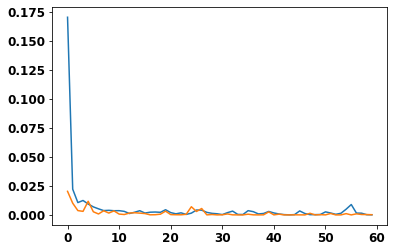

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

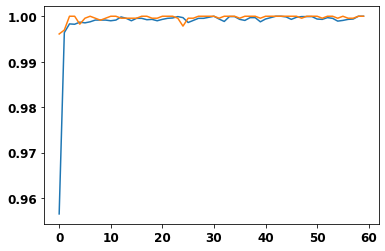

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Apply preprocessing on test data:

In [ ]:
x_test

In [ ]:
x_test_pre = x_test.drop(['Unnamed: 0','m_power','Tosc','Tmix'],axis=1)

for column in x_test_pre:
 u = x_test_pre[column].mean()
 s = x_test_pre[column].std()
 #print(u,s)
 x_test_pre[column] = x_test_pre[column].apply(lambda x: (x-u)/s)
 

In [ ]:
x_test_pre

,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,2.113655,0.248209,0.065229,0.824821,0.651812,-0.253507,-0.337938,-0.376232
1,-0.204469,0.989883,0.598391,0.552852,0.961057,0.009472,0.217571,0.139326
2,2.178877,0.487919,0.147551,0.741144,0.689904,-0.715442,-0.243720,-0.512497
3,-0.822852,-0.890754,0.920360,-1.285824,-1.573939,0.070108,0.801822,0.587762
4,-1.304994,0.222570,0.679333,-0.533221,1.036050,0.356803,0.409896,0.408091
...,...,...,...,...,...,...,...,...
3835,-1.821907,0.580336,-0.939763,0.948883,0.247139,-0.962445,-1.054706,-1.216769
3836,0.396605,-1.224554,0.951143,-1.398572,-1.600186,0.129635,0.888073,0.663261
3837,-0.160763,-2.351938,1.102634,-1.595667,-1.729693,1.175124,1.962474,1.850284
3838,-0.335004,1.313375,-0.052444,0.393568,0.555088,-0.074571,-0.504582,-0.437708


Generate predictions for testing data:

In [ ]:
y_test_model = model.predict(x_test_pre, verbose=0)

y_test_post = (y_test_model > 0.5).astype(int)
y_test_res = np.argmax(y_test_post, axis=1)+1
y_test = pd.DataFrame(y_test_res,columns=['target'])
indx=np.arange(len(y_test))
y_test = y_test.assign(id=range(len(y_test)))
y_test = y_test[['id','target']]

In [ ]:
y_test

,id,target
0,0,5
1,1,8
2,2,5
3,3,1
4,4,6
...,...,...
3835,3835,7
3836,3836,1
3837,3837,2
3838,3838,3


Create CSV file:

In [ ]:
y_test.to_csv('submission.csv',index=False)